<a href="https://www.kaggle.com/code/thirumani/shark-tank-australia-data-analysis?scriptVersionId=174262779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:blue;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">SharkTank Australia Exploratory Data Analysis (EDA)</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-australia-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2024-Apr-27 with Python version
Python 3.10.13


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/5/50/Shark_Tank_Australia_logo.png', width=310, height=210)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-australia-dataset/
shark_tank = pd.read_csv('/kaggle/input/shark-tank-australia-dataset/Shark Tank Australia dataset.csv')

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 52
-rw-r--r-- 1 nobody nogroup 51359 Apr 27 08:07 'Shark Tank Australia dataset.csv'

There are 219 rows and 52 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number   Startup Name  Episode Number  Pitch Number Season Start  \
0              1  CricketCooler               1             1     8-Feb-15   
1              1     RentResumé               1             2     8-Feb-15   
2              1     CaseBoards               1             3     8-Feb-15   
3              1         Hamdog               1             4     8-Feb-15   
4              1  EdibleBugShop               2             5     8-Feb-15   

  Season End Original Air Date                 Industry  \
0   7-Jun-15          8-Feb-15  Fitness/Sports/Outdoors   
1   7-Jun-15          8-Feb-15            Software/Tech   
2   7-Jun-15          8-Feb-15              Electronics   
3   7-Jun-15          8-Feb-15        Food and Beverage   
4   7-Jun-15         15-Feb-15        Business Services   

                                Business Description Company Website  \
0               An esky with attached cricket stumps             NaN   
1  Online rental subscription that details rental...             NaN   
2  Portable, electric remote controlled skateboar...             NaN   
3                  hamburger and hot dog combination             NaN   
4  Edible insect business selling ground cricket ...             NaN   

   Pitchers Gender  Pitchers City  Pitchers State  Pitchers Average Age  \
0              NaN            NaN             NaN                   NaN   
1              NaN            NaN             NaN                   NaN   
2              NaN            NaN             NaN                   NaN   
3              NaN            NaN             NaN                   NaN   
4              NaN            NaN             NaN                   NaN   

            Entrepreneur Names  Multiple Entrepreneurs  Viewers  \
0  Adam Dubrich & Leigh Warren                       1  616,000   
1                 Darren Smith                       0  616,000   
2                   Adam Riley                       0  616,000   
3                  Mark Murray                       0  616,000   
4               Skye Blackburn                       0  688,000   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0               280000                     20.0              1400000   
1              2500000                     40.0              6250000   
2                20000                     10.0               200000   
3                    1                     25.0                    4   
4               170000                     20.0               850000   

   Received Offer  Accepted Offer  Total Deal Amount  Total Deal Equity  \
0               1             1.0           280000.0               20.0   
1               0             NaN                NaN                NaN   
2               1             1.0            40000.0               35.0   
3               1             1.0                2.0               50.0   
4               1             1.0           170000.0               50.0   

   Deal Valuation  ...  Equity Per Shark  Royalty Deal  \
0       1400000.0  ...              20.0           NaN   
1             NaN  ...               NaN           NaN   
2        114286.0  ...              17.5           NaN   
3             4.0  ...              50.0           NaN   
4        340000.0  ...              50.0           NaN   

   Advisory Shares Equity      Loan  Deal Has Conditions  Mentorship  \
0                     NaN  200000.0                  NaN         NaN   
1                     NaN       NaN                  NaN         NaN   
2                     NaN       NaN                  NaN         NaN   
3                     NaN       NaN                  NaN         NaN   
4                     NaN       NaN                  NaN         NaN   

  Steve Investment Amount Steve Investment Equity  Janine Investment Amount  \
0                     NaN                     NaN                       NaN   
1                     NaN                     NaN                   

In [6]:
shark_tank.tail(10).T

209  \
Season Number                                        4   
Startup Name                        WrinklesSchminkles   
Episode Number                                      12   
Pitch Number                                       210   
Season Start                                 15-May-18   
Season End                                    7-Aug-18   
Original Air Date                            31-Jul-18   
Industry                                Fashion/Beauty   
Business Description         silicon patches for women   
Company Website                                    NaN   
Pitchers Gender                                    NaN   
Pitchers City                                      NaN   
Pitchers State                                     NaN   
Pitchers Average Age                               NaN   
Entrepreneur Names                   Gabrielle Requena   
Multiple Entrepreneurs                               0   
Viewers                                        440,000   
Original Ask Amount                             300000   
Original Offered Equity                           17.0   
Valuation Requested                            1764706   
Received Offer                                       0   
Accepted Offer                                     NaN   
Total Deal Amount                                  NaN   
Total Deal Equity                                  NaN   
Deal Valuation                                     NaN   
Number of Sharks in Deal                           NaN   
Investment Amount Per Shark                        NaN   
Equity Per Shark                                   NaN   
Royalty Deal                                       NaN   
Advisory Shares Equity                             NaN   
Loan                                               NaN   
Deal Has Conditions                                NaN   
Mentorship                                         NaN   
Steve Investment Amount                            NaN   
Steve Investment Equity                            NaN   
Janine Investment Amount                           NaN   
Janine Investment Equity                           NaN   
Andrew Investment Amount                           NaN   
Andrew Investment Equity                           NaN   
Naomi Investment Amount                            NaN   
Naomi Investment Equity                            NaN   
Glen Investment Amount                             NaN   
Glen Investment Equity                             NaN   
Guest Investment Amount                            NaN   
Guest Investment Equity                            NaN   
Guest Name                                         NaN   
Steve Present                                      1.0   
Janine Present                                     1.0   
Andrew Present                                     1.0   
Naomi Present                                      1.0   
Glen Present                                       1.0   
Guest Present                                      NaN   

                                                 210  \
Season Number                                      4   
Startup Name                                 HexPegs   
Episode Number                                    12   
Pitch Number                                     211   
Season Start                               15-May-18   
Season End                                  7-Aug-18   
Original Air Date                          31-Jul-18   
Industry                     Fitness/Sports/Outdoors   
Business Description         caravan and camping peg   
Company Website                                  NaN   
Pitchers Gender                                  NaN   
Pitchers City                                    NaN   
Pitchers State                                   NaN   
Pitchers Average Age                             NaN   
Entrepreneur Names                      Damian Joyce   
Multiple Entrepreneurs                             0   
Viewers                 

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

shark_tank['Viewers'] = shark_tank['Viewers'].str.replace(',','')
shark_tank['Viewers'] = pd.to_numeric(shark_tank['Viewers'])

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season Number                219 non-null    Int32  
 1   Startup Name                 219 non-null    object 
 2   Episode Number               219 non-null    Int32  
 3   Pitch Number                 219 non-null    Int32  
 4   Season Start                 219 non-null    object 
 5   Season End                   219 non-null    object 
 6   Original Air Date            219 non-null    object 
 7   Industry                     219 non-null    object 
 8   Business Description         219 non-null    object 
 9   Company Website              20 non-null     object 
 10  Pitchers Gender              0 non-null      float64
 11  Pitchers City                0 non-null      float64
 12  Pitchers State               0 non-null      float64
 13  Pitchers Average Age

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 5
Number of unique values in Startup Name - 219
Number of unique values in Episode Number - 15
Number of unique values in Pitch Number - 219
Number of unique values in Season Start - 5
Number of unique values in Season End - 5
Number of unique values in Original Air Date - 55
Number of unique values in Industry - 15
Number of unique values in Business Description - 219
Number of unique values in Company Website - 20
Number of unique values in Pitchers Gender - 0
Number of unique values in Pitchers City - 0
Number of unique values in Pitchers State - 0
Number of unique values in Pitchers Average Age - 0
Number of unique values in Entrepreneur Names - 219
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in Viewers - 53
Number of unique values in Original Ask Amount - 61
Number of unique values in Original Offered Equity - 33
Number of unique values in Valuation Requested - 88
Number of unique values in Received Offer

In [12]:
# Latest/current season data
shark_tank_recent = shark_tank.loc[(shark_tank['Season Number']==5)]

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Australia SharkTank\n")
print(shark_tank['Pitch Number'].max(), "#startups came for pitching \n")

5 total seasons in Australia SharkTank

219 #startups came for pitching 



Season Number    1   2   3   4  5
Episode Number  15  13  13  13  1


([], [])

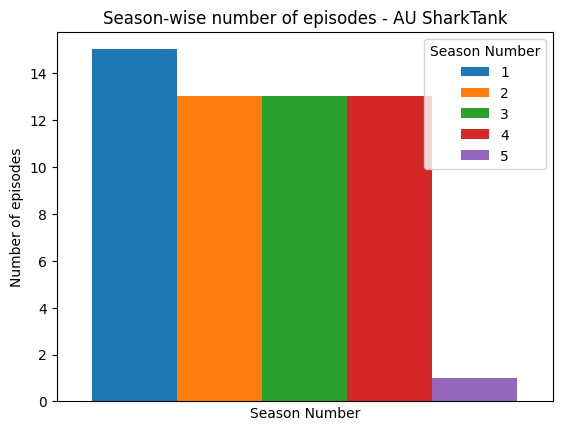

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
tmp.plot(kind='bar', use_index=False, width=3.0)
plt.xlabel("Season Number")
plt.ylabel("Number of episodes")
plt.title("Season-wise number of episodes - AU SharkTank")
plt.xticks([])

In [15]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank Australia - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=580, height=440)
fig.update_yaxes(tickvals=list(range(16)))
fig.update_xaxes(visible=False)
fig.show()

In [16]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank AU - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [18]:
# Types of industries, came for investment, in current/latest season (5th season)
tmp = shark_tank_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Australia Shark Tank in current/latest season (5th season) - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=450)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [19]:
# # Gender wise
# print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# # In percentage
# print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Gender wise percentage")
# shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
# plt.ylabel('')

In [20]:
# # Age wise
# print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# # In percentage
# print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Age wise percentage")
# shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
# plt.ylabel('')

### 💹 61% companies received offers and 39% startups could not convince Sharks to invest

Received Offer
1    134
0     85
Name: count, dtype: int64 

Received Offer
1    61%
0    39%
Name: proportion, dtype: object


Text(0, 0.5, '')

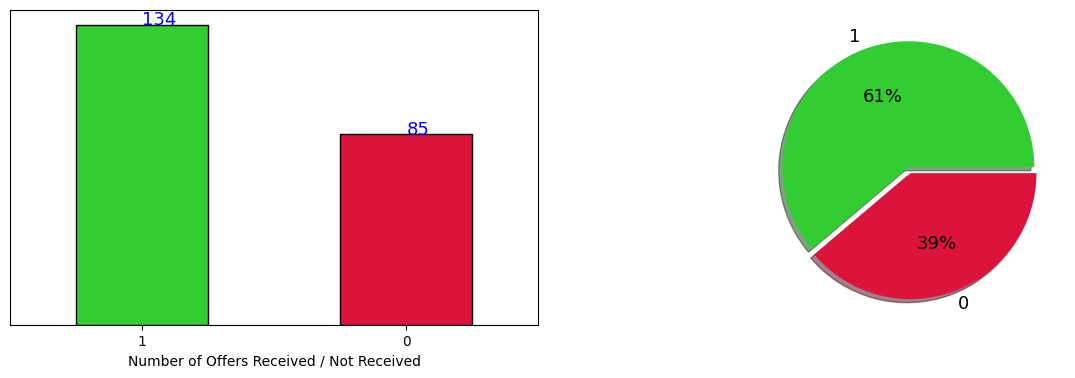

In [21]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received")
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 134 companies received offers & 85 startups could not convince #Sharks to invest.

### ＄ 85% companies accepted offers and 15% startups didn't accept Sharks offer


Accepted Offer
1.0    114
0.0     20
Name: count, dtype: int64 

Accepted Offer
1.0    85%
0.0    15%
Name: proportion, dtype: object


Text(0, 0.5, '')

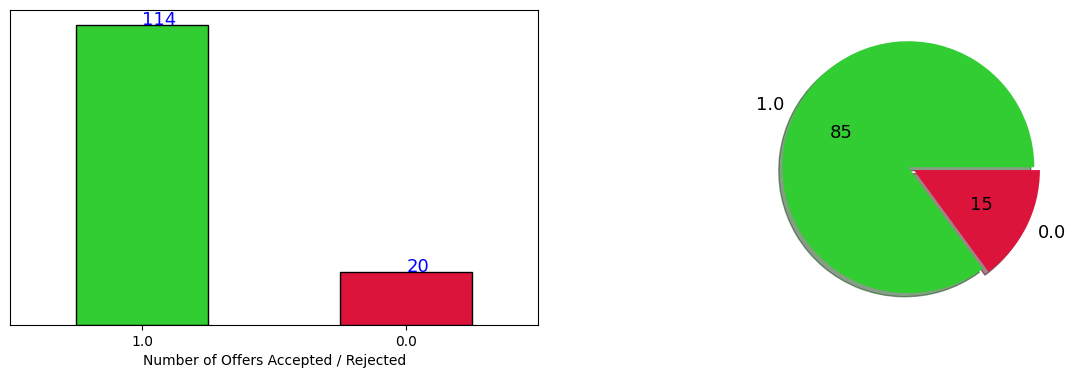

In [22]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15, 9))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Accepted / Rejected")
plt.yticks([])
plt.xticks(rotation = 0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 114 companies accepted investments they got & 20 #Startups did not accept Shark's offer.

In [23]:
# Offers rejected by pitchers/startup companies
print(shark_tank[shark_tank['Accepted Offer']==0]["Startup Name"].count())
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Season Number","Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]

20


Season Number               Startup Name                 Industry  \
9                1                   Surfsafe  Fitness/Sports/Outdoors   
16               1                Expocentric        Business Services   
29               1             ThePartyPeople        Business Services   
35               1                  WeTeachMe       Children/Education   
44               1                      Crisp        Food and Beverage   
64               2                CleverScore        Business Services   
66               2                    Disrupt  Fitness/Sports/Outdoors   
75               2              OrmsbyGuitars           Lifestyle/Home   
103              2                  Parkhound        Business Services   
105              2                        Mup           Lifestyle/Home   
118              3  GenerationOutcastClothing           Fashion/Beauty   
126              3                 OverTheMoo        Food and Beverage   
133              3               SleepingDuck           Lifestyle/Home   
148              3                   Speedfit  Fitness/Sports/Outdoors   
151              3                Hummingbird        Food and Beverage   
158              3                 BuckleMeUp            Software/Tech   
166              4           YourMatesBrewery           Liquor/Alcohol   
167              4               BistroMorgan        Food and Beverage   
187              4                     Vodka+          Health/Wellness   
188              4                     Gamify            Software/Tech   

     Original Ask Amount  Original Offered Equity  
9                 120000                      5.0  
16               2000000                     10.0  
29                400000                      5.0  
35                200000                      2.5  
44                700000                     10.0  
64                200000                     25.0  
66                250000                      5.8  
75                200000                     10.0  
103               400000                     10.0  
105               300000                      5.0  
118                90000                     10.0  
126               250000                      8.0  
133               500000                      5.0  
148               280000                     10.0  
151               200000                     10.0  
158               390000                     10.0  
166               750000                     25.0  
167               200000                     20.0  
187               250000                     10.0  
188               200000                     10.0

In [24]:
# # Gender wise distribution, who received the offer
# print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who received the offer")
# shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
# plt.ylabel('')

In [25]:
# # Gender wise distribution, who could NOT receive the offer
# print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who could NOT receive the offer")
# shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
# plt.ylabel('')

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [26]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [27]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'AUD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - A$5,000,000


In [28]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'AUD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - A$0


In [29]:
# Sum of investment amount asked, in Shark Tank Australia
print("Sum of investment amount asked, by all startup companies, in Australia Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Australia Shark Tank - A$64,585,021


In [30]:
# Amount invested by all sharks, in Australia SharkTank
print("Amount invested by all sharks, in Shark Tank Australia -", format_currency(shark_tank['Total Deal Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank Australia - A$24,231,032


In [31]:
# Sum of loan/debt amount, in Australian Shark Tank
print("Sum of loan/debt amount, given by all sharks, in Australian SharkTank -", format_currency(shark_tank['Loan'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in Australian SharkTank - A$3,235,000


In [32]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show()

# iCapsulate has biggest deal in #SharkTankAustralia history

Startup Name
iCapsulate          2500000.0
PaleoCafé            750000.0
OneWorld             700000.0
LilFairyDoors        650000.0
ScopeITEducation     632000.0
GanacheChocolate     600000.0
OnTheGoSports        600000.0
CancerAid            500000.0
TorqueSafe           500000.0
SharknadoAlive       475000.0
MiniPallets          400000.0
HegsPegs             380000.0
QPay                 380000.0
KidsCo               375000.0
ScrubbaWashBag       360000.0
Name: Total Deal Amount, dtype: float64


In [33]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

# 1 startup sold entire company (equity) to Sharks

Startup Name
Catch'N'Release           100.0
CharliChair                50.0
EctoHandPlanes             50.0
EdibleBugShop              50.0
Hamdog                     50.0
MelanieNewman              50.0
SharknadoAlive             50.0
Three65Underwear           50.0
TommySugo                  50.0
TorqueSafe                 50.0
HitWithME                  49.0
NevermindAdventure         49.0
SweetMickie                46.0
JimalieCoconutProducts     45.0
Koja                       45.0
Synxsole                   45.0
Deliciou                   44.0
10-WayNecklace             40.0
Bottlepops                 40.0
Cart-A-Lot                 40.0
Name: Total Deal Equity, dtype: float64


In [34]:
# Startups who sold 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name    5
dtype: int64
     Season Number     Startup Name  Total Deal Equity
38               1  TheDinnerLadies               33.0
113              2         OneWorld               33.0
122              3     HeyDayButter               33.0
146              3        JustJerky               33.0
203              4       SnapSocial               33.0


In [35]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 25 



Season Number        Startup Name  Total Deal Amount  Total Deal Equity  \
0                1       CricketCooler           280000.0               20.0   
11               1      MobileTyreShop           150000.0               10.0   
22               1            HegsPegs           380000.0               15.0   
32               1           TommySugo           350000.0               50.0   
36               1         CharliChair           200000.0               50.0   
39               1  GrownWoodenEyewear            60000.0               40.0   
47               1    Three65Underwear           120000.0               50.0   
50               1                Koja           150000.0               45.0   
55               1  HaloMedicalDevices           200000.0               21.0   
58               1  PiccaninnyTinyTots            40000.0               40.0   
59               1         SonseeWoman           100000.0               20.0   
82               2              CapHat           120000.0               10.0   
89               2         2WHEELBoard           100000.0                0.0   
96               2    SuperchargedFood           200000.0               35.0   
102              2           KisaPhone           200000.0               10.0   
106              2          Pentablock           350000.0               17.0   
110              2       LilFairyDoors           650000.0               20.0   
111              2             Vegepod           225000.0               20.0   
131              3          Kaf.Tanned           150000.0               25.0   
137              3    TheMondayFoodCo.           300000.0               40.0   
138              3              Cardly           250000.0               15.0   
141              3           BeFitFood           300000.0               33.3   
192              4              KidsCo           375000.0               25.0   
194              4           Bare+Boho            85000.0               30.0   
212              4           BirthBeat           200000.0               20.0   

         Loan  
0    200000.0  
11   100000.0  
22   280000.0  
32   200000.0  
36   100000.0  
39    20000.0  
47    60000.0  
50   100000.0  
55   100000.0  
58    20000.0  
59    80000.0  
82   120000.0  
89   100000.0  
96   100000.0  
102  100000.0  
106  200000.0  
110  325000.0  
111   75000.0  
131  100000.0  
137  200000.0  
138  100000.0  
141  100000.0  
192  300000.0  
194   55000.0  
212  100000.0

In [36]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 4 



Season Number     Startup Name  Total Deal Amount  Total Deal Equity
20               1       RescueSwag           100000.0               40.0
120              3  Catch'N'Release           200000.0              100.0
163              3     FreshMeals2U           200000.0               25.0
218              5           Stryda            50000.0               30.0

In [37]:
# Startups who gave Advisory shares
print("Number of startups who gave Advisory shares/equity", shark_tank['Advisory Shares Equity'].count(),"\n")

shark_tank.loc[shark_tank['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave Advisory shares/equity 0 



Empty DataFrame
Columns: [Season Number, Startup Name, Total Deal Amount, Total Deal Equity, Advisory Shares Equity]
Index: []

In [38]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 5 



Season Number      Startup Name  Total Deal Amount  Total Deal Equity
82               2            CapHat           120000.0               10.0
138              3            Cardly           250000.0               15.0
163              3      FreshMeals2U           200000.0               25.0
185              4  GanacheChocolate           600000.0               40.0
206              4         SpacetoCo           210000.0               21.0

In [39]:
# Startups who received Mentorship
print("Number of startups who got mentorship", shark_tank['Mentorship'].count(),"\n")

shark_tank.loc[shark_tank['Mentorship'].notnull()][["Season Number","Pitch Number","Startup Name","Mentorship"]]

Number of startups who got mentorship 8 



Season Number  Pitch Number     Startup Name  Mentorship
120              3           121  Catch'N'Release       Naomi
123              3           124      ThePoleRoom      Janine
139              3           140           360Gym  Steve,Glen
143              3           144     BethanyGrace      Janine
159              3           160   CrookedCompass       Naomi
167              4           168     BistroMorgan      Janine
188              4           189           Gamify       Naomi
211              4           212    MinnowDesigns       Naomi

In [40]:
shark_tank.groupby('Mentorship')['Mentorship'].value_counts().sort_values(ascending=False)

# Naomi has offered Mentorship to more startups

Mentorship
Naomi         4
Janine        3
Steve,Glen    1
Name: count, dtype: int64

In [41]:
# # Gender/age wise pitchers combination
# shark_tank.groupby([shark_tank['Pitchers Gender'], shark_tank['Pitchers Average Age'], shark_tank['Multiple Entrepreneurs']]).size().nlargest(10)

# # Groups/Couples in middle age is most frequent combination followed by Male/Female in middle age

## 💰 Which shark invested most ?

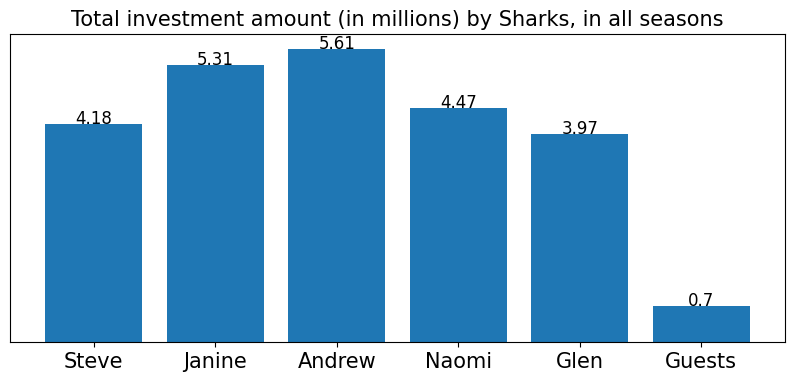

In [42]:
# Amount Invested by sharks
Amount = [(shark_tank['Steve Investment Amount']/1000000).sum(), (shark_tank['Janine Investment Amount']/1000000).sum(), (shark_tank['Andrew Investment Amount']/1000000).sum(), (shark_tank['Naomi Investment Amount']/1000000).sum(),
    (shark_tank['Glen Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Steve','Janine','Andrew','Naomi','Glen','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

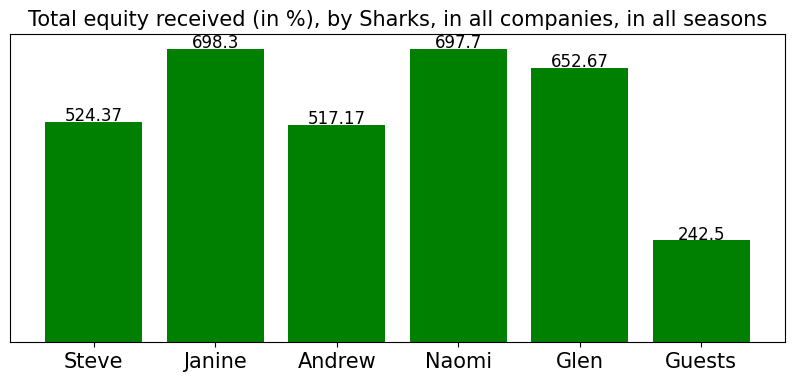

In [43]:
# Equity received by sharks, in all seasons
Equity = [shark_tank['Steve Investment Equity'].sum(), shark_tank['Janine Investment Equity'].sum(), shark_tank['Andrew Investment Equity'].sum(), shark_tank['Naomi Investment Equity'].sum(),
    shark_tank['Glen Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

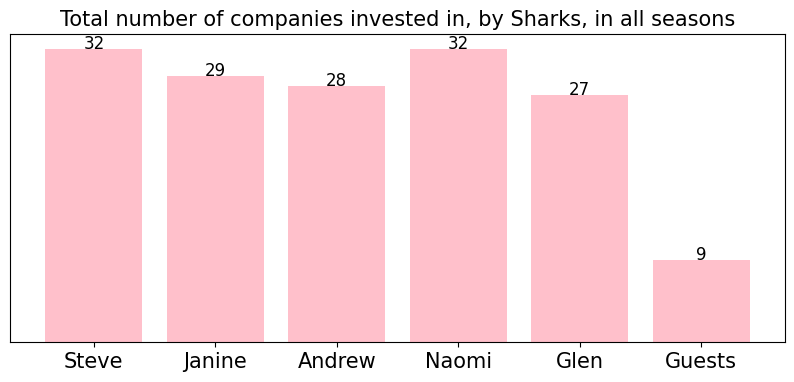

In [44]:
# Number of companies invested
Amount = [(shark_tank['Steve Investment Amount']).count(), (shark_tank['Janine Investment Amount']).count(), (shark_tank['Andrew Investment Amount']).count(), (shark_tank['Naomi Investment Amount']).count(),
    (shark_tank['Glen Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

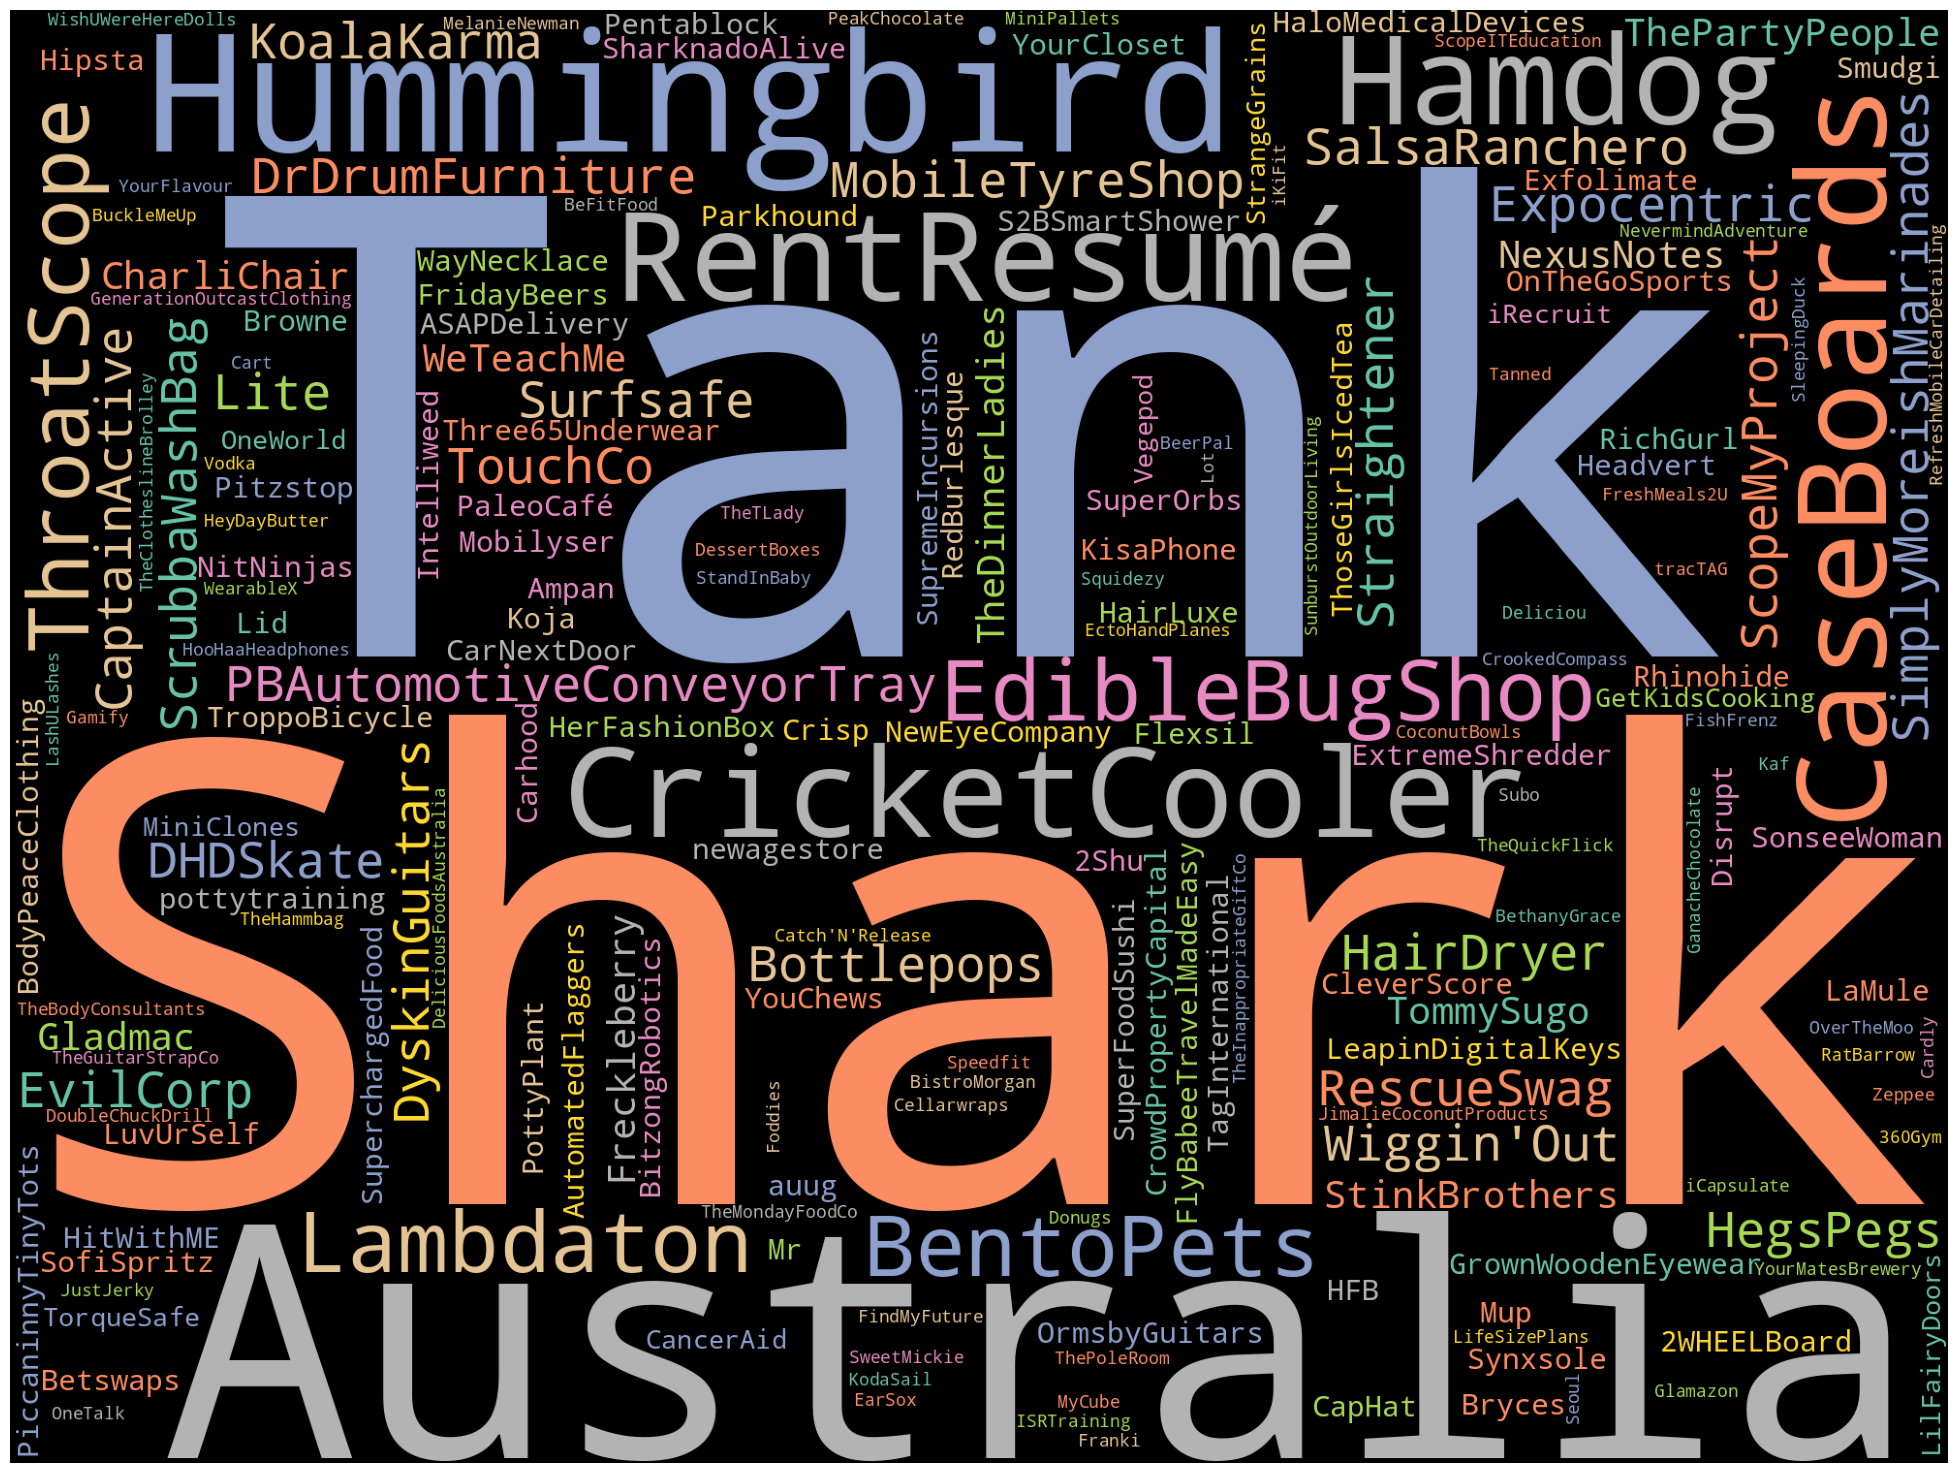

In [45]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank Australia ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

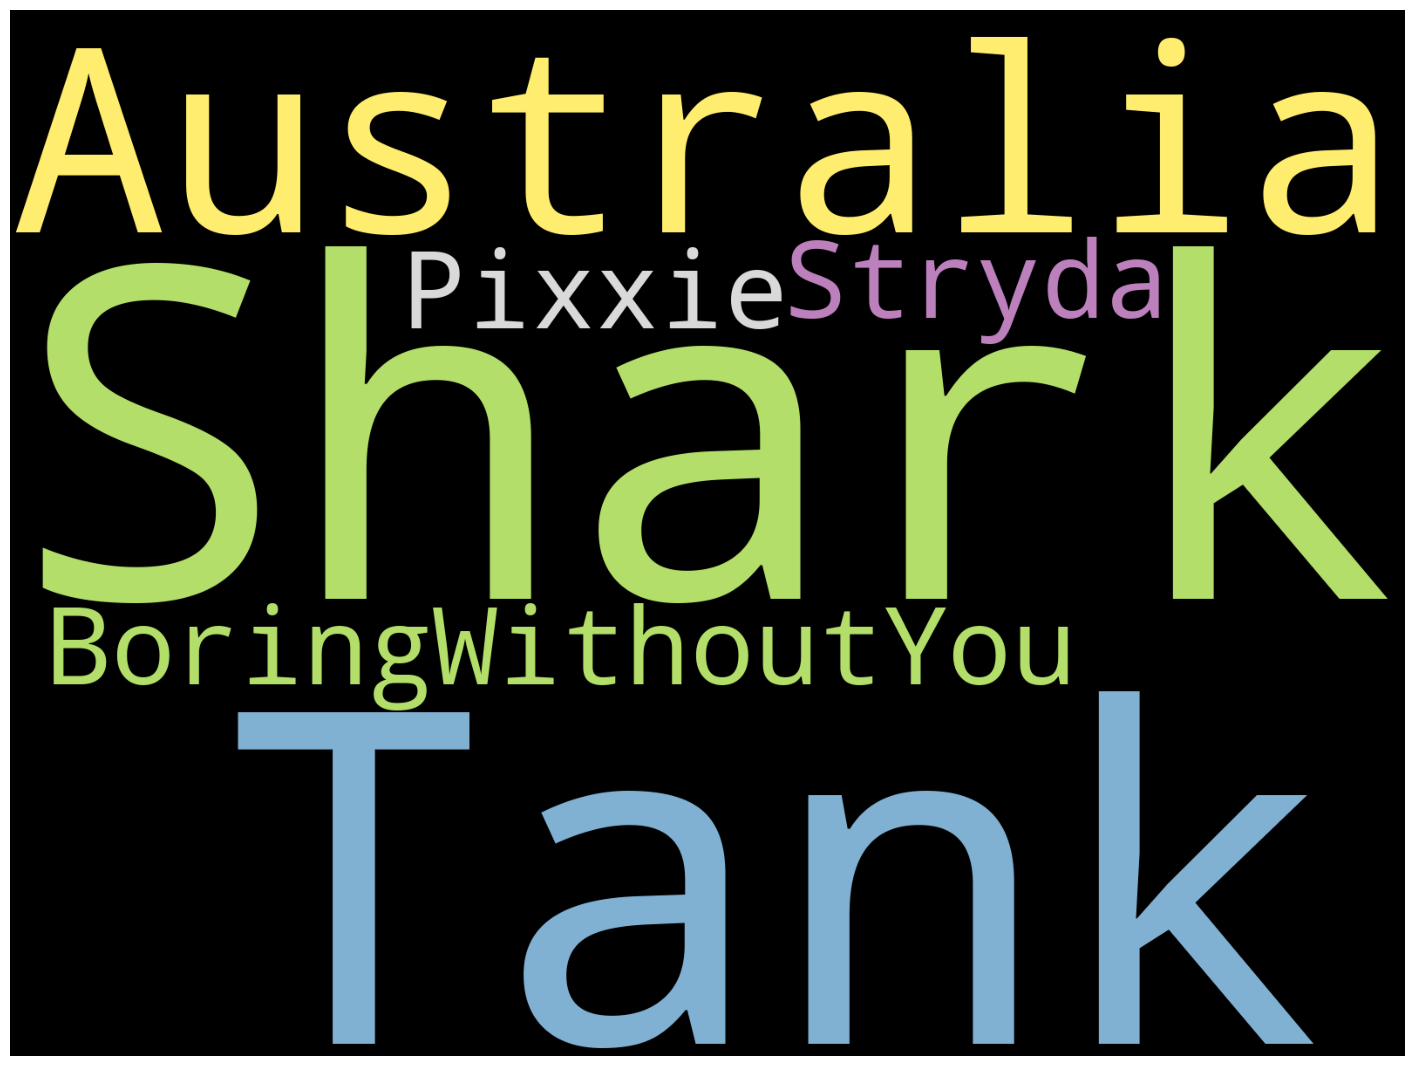

In [46]:
# Word cloud based on Startup Names, in current/latest season (5th season)
text = " Shark Tank Australia ".join(cat for cat in shark_tank_recent['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥Steve's Investments

Total investments by Steve  32
Investment amount by Steve A$4,179,500
Equity received by Steve 524.37 % in different companies

Company details:
------------------------------------------------------------------------------------------
      Startup Name                Industry  Steve Investment Amount
       ThroatScope         Health/Wellness              76000.00000
    MobileTyreShop              Automotive              75000.00000
        RescueSwag          Lifestyle/Home             100000.00000
    ScrubbaWashBag             Electronics             180000.00000
        Bottlepops Fitness/Sports/Outdoors              75000.00000
      Hummingbirds      Children/Education              40000.00000
PiccaninnyTinyTots      Children/Education              20000.00000
 ThoseGirlsIcedTea       Food and Beverage              70000.00000
     OnTheGoSports Fitness/Sports/Outdoors             200000.00000
    SharknadoAlive     Media/Entertainment              95000.00000
       CarNextDo

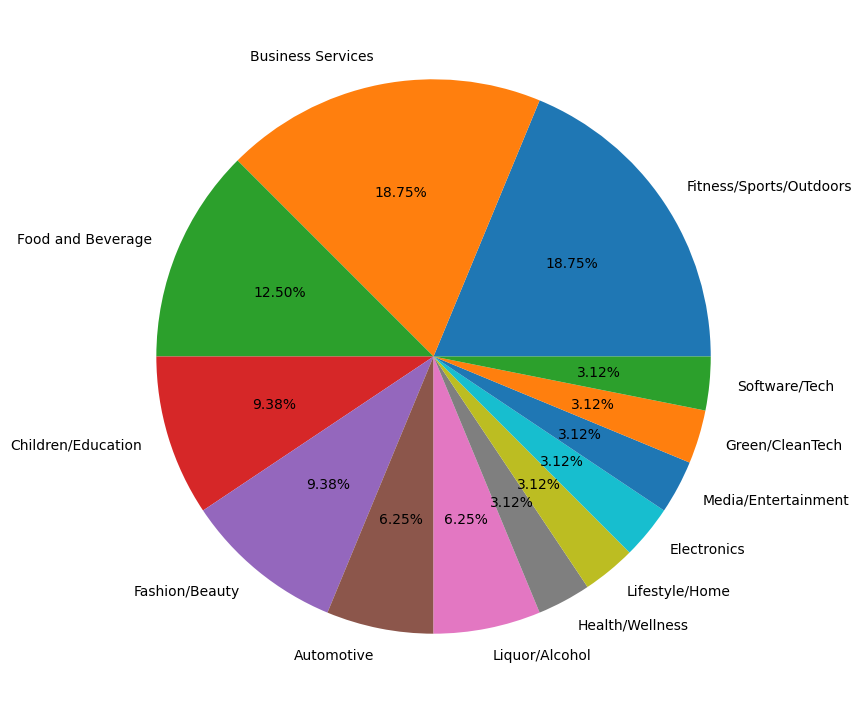

In [47]:
print("Total investments by Steve", shark_tank[shark_tank['Steve Investment Amount']>0][['Steve Investment Amount']].count().to_string()[-3:])
print("Investment amount by Steve", format_currency(shark_tank['Steve Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Steve", round(shark_tank['Steve Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Steve Investment Amount']>0][["Startup Name","Industry","Steve Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nSteve industry wise investments\n")
print(shark_tank[shark_tank['Steve Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Steve Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Steve Investment Amount']>0] [["Startup Name","Steve Investment Amount","Steve Investment Equity"]].sort_values(by="Steve Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Steve Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Janine's Investments

Total investments by Janine  29
Investment amount by Janine A$5,306,000
Equity received by Janine 698.3 % in different companies

Company details:
------------------------------------------------------------------------------------------
           Startup Name                Industry  Janine Investment Amount
             CaseBoards             Electronics                   20000.0
          EdibleBugShop       Business Services                  170000.0
         ScrubbaWashBag             Electronics                  180000.0
              TommySugo       Food and Beverage                  350000.0
        TheDinnerLadies       Food and Beverage                  216000.0
 FlyBabeeTravelMadeEasy      Children/Education                   80000.0
       Three65Underwear          Fashion/Beauty                   60000.0
          OnTheGoSports Fitness/Sports/Outdoors                  200000.0
         SharknadoAlive     Media/Entertainment                   95000.0
     HerFashionBox(HFB

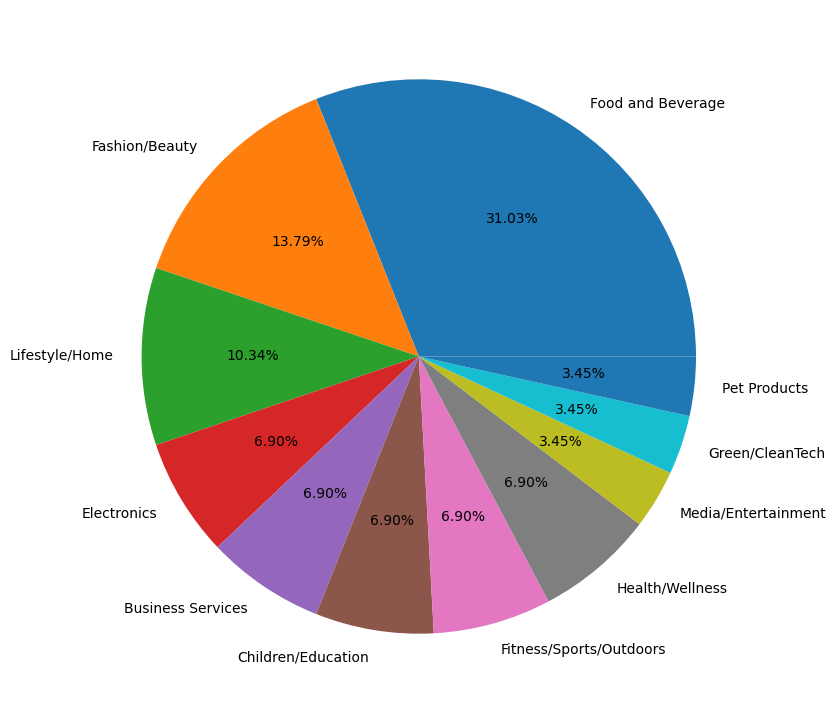

In [48]:
print("Total investments by Janine", shark_tank[shark_tank['Janine Investment Amount']>0][['Janine Investment Amount']].count().to_string()[-3:])
print("Investment amount by Janine", format_currency(shark_tank['Janine Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Janine", round(shark_tank['Janine Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Janine Investment Amount']>0][["Startup Name","Industry","Janine Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nJanine industry wise investments\n")
print(shark_tank[shark_tank['Janine Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Janine Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Janine Investment Amount']>0] [["Startup Name","Janine Investment Amount","Janine Investment Equity"]].sort_values(by="Janine Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Janine Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Andrew's Investments

Total investments by Andrew  28
Investment amount by Andrew A$5,606,517
Equity received by Andrew 517.17 % in different companies

Company details:
------------------------------------------------------------------------------------------
      Startup Name                Industry  Andrew Investment Amount
        CaseBoards             Electronics              2.000000e+04
            Hamdog       Food and Beverage              2.000000e+00
        Bottlepops Fitness/Sports/Outdoors              7.500000e+04
          Synxsole          Fashion/Beauty              1.000000e+05
HaloMedicalDevices         Health/Wellness              1.000000e+05
     OnTheGoSports Fitness/Sports/Outdoors              2.000000e+05
    SharknadoAlive     Media/Entertainment              9.500000e+04
HerFashionBox(HFB)          Fashion/Beauty              1.000000e+05
         Rhinohide              Automotive              4.000000e+04
            CapHat          Fashion/Beauty              6.000000e+04
  

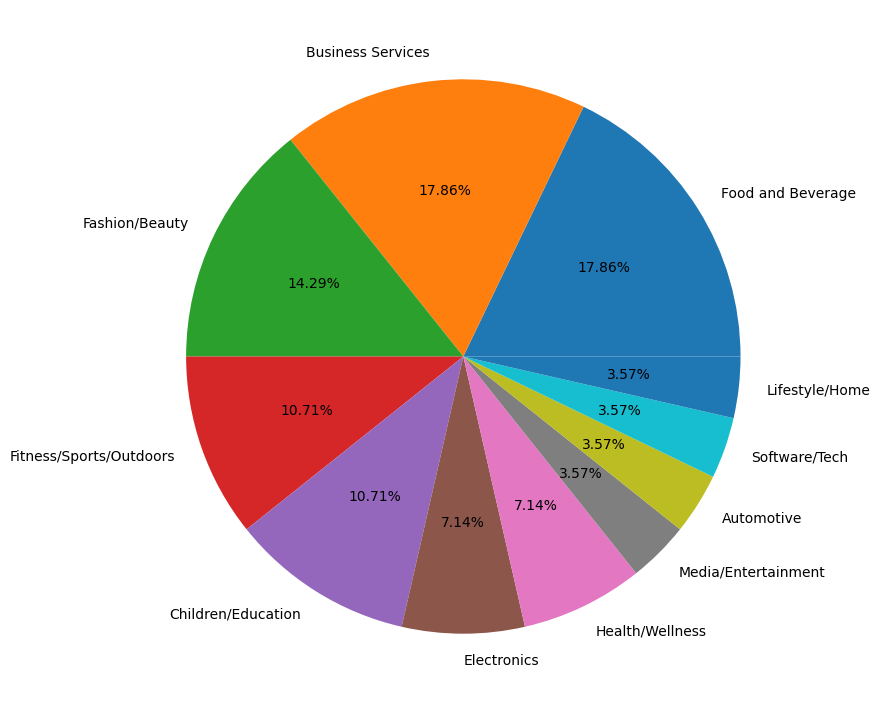

In [49]:
print("Total investments by Andrew", shark_tank[shark_tank['Andrew Investment Amount']>0][['Andrew Investment Amount']].count().to_string()[-3:])
print("Investment amount by Andrew", format_currency(shark_tank['Andrew Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Andrew", round(shark_tank['Andrew Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Andrew Investment Amount']>0][["Startup Name","Industry","Andrew Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nAndrew industry wise investments\n")
print(shark_tank[shark_tank['Andrew Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Andrew Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Andrew Investment Amount']>0] [["Startup Name","Andrew Investment Amount","Andrew Investment Equity"]].sort_values(by="Andrew Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Andrew Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Naomi's Investments

Total investments by Naomi  32
Investment amount by Naomi A$4,470,015
Equity received by Naomi 697.7 % in different companies

Company details:
------------------------------------------------------------------------------------------
           Startup Name                Industry  Naomi Investment Amount
          CricketCooler Fitness/Sports/Outdoors                 280000.0
               HegsPegs          Lifestyle/Home                 380000.0
     GrownWoodenEyewear          Lifestyle/Home                  30000.0
       Three65Underwear          Fashion/Beauty                  60000.0
     HaloMedicalDevices         Health/Wellness                 100000.0
            SonseeWoman          Fashion/Beauty                 100000.0
         SharknadoAlive     Media/Entertainment                  95000.0
       TagInternational Fitness/Sports/Outdoors                  50000.0
        ExtremeShredder Fitness/Sports/Outdoors                  50000.0
             YourCloset          Fa

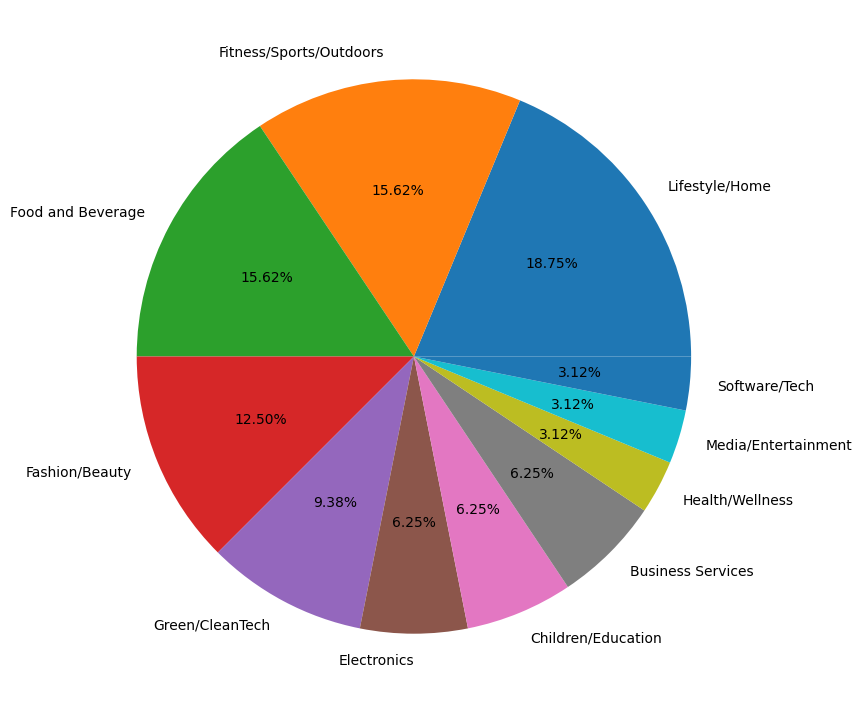

In [50]:
print("Total investments by Naomi", shark_tank[shark_tank['Naomi Investment Amount']>0][['Naomi Investment Amount']].count().to_string()[-3:])
print("Investment amount by Naomi", format_currency(shark_tank['Naomi Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Naomi", round(shark_tank['Naomi Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Naomi Investment Amount']>0][["Startup Name","Industry","Naomi Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nNaomi industry wise investments\n")
print(shark_tank[shark_tank['Naomi Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Naomi Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Naomi Investment Amount']>0] [["Startup Name","Naomi Investment Amount","Naomi Investment Equity"]].sort_values(by="Naomi Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Naomi Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Glen's Investments

Total investments by Glen  27
Investment amount by Glen A$3,974,000
Equity received by Glen 652.67 % in different companies

Company details:
------------------------------------------------------------------------------------------
          Startup Name                Industry  Glen Investment Amount
        SharknadoAlive     Media/Entertainment             95000.00000
              Betswaps Fitness/Sports/Outdoors            100000.00000
             Rhinohide              Automotive             40000.00000
            PottyPlant       Business Services             70000.00000
         NewEyeCompany       Business Services             50000.00000
           Intelliweed         Green/CleanTech            175000.00000
             HitWithME Fitness/Sports/Outdoors             50000.00000
            SofiSpritz          Liquor/Alcohol             65000.00000
        GetKidsCooking      Children/Education            150000.00000
         LilFairyDoors      Children/Education           

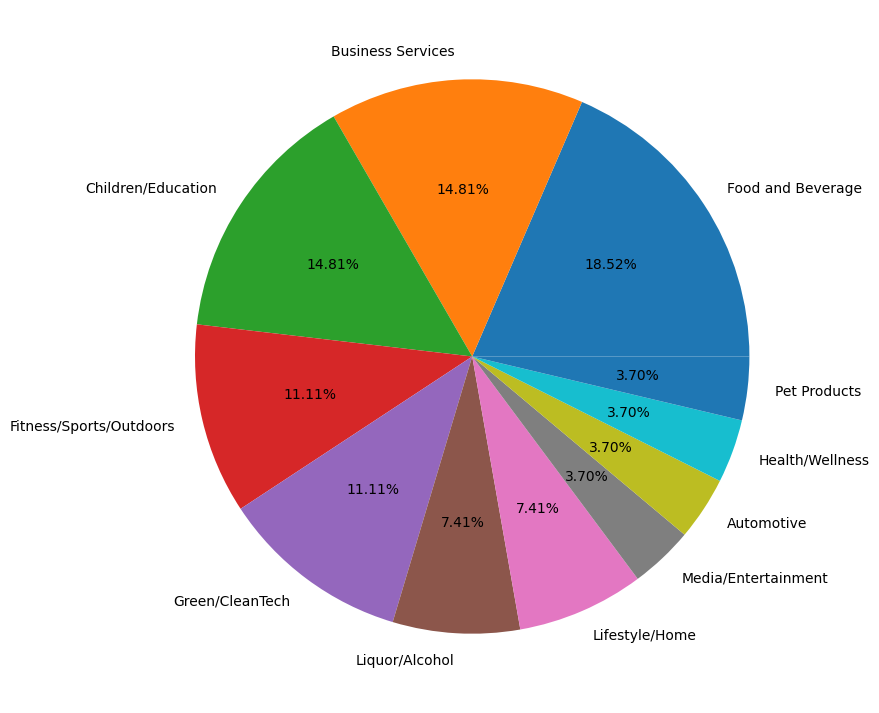

In [51]:
print("Total investments by Glen", shark_tank[shark_tank['Glen Investment Amount']>0][['Glen Investment Amount']].count().to_string()[-3:])
print("Investment amount by Glen", format_currency(shark_tank['Glen Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Glen", round(shark_tank['Glen Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Glen Investment Amount']>0][["Startup Name","Industry","Glen Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nGlen industry wise investments\n")
print(shark_tank[shark_tank['Glen Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Glen Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Glen Investment Amount']>0] [["Startup Name","Glen Investment Amount","Glen Investment Equity"]].sort_values(by="Glen Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Glen Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 All Guest's Investments

Total investments by all Guests  9
Investment amount by all Guests A$695,000
Equity received by all Guests 242.5 % in different companies

Company details:
--------------------------------------------------------------------------------------------
      Startup Name           Industry  Guest Investment Amount                            Guest Name
    MobileTyreShop         Automotive                  75000.0                                  John
     SalsaRanchero  Food and Beverage                  80000.0                                  John
      Hummingbirds Children/Education                  40000.0                                  John
       CharliChair Children/Education                 200000.0                                  John
GrownWoodenEyewear     Lifestyle/Home                  30000.0                                  John
              Koja  Food and Beverage                 150000.0                                  John
PiccaninnyTinyTots Children/Education       

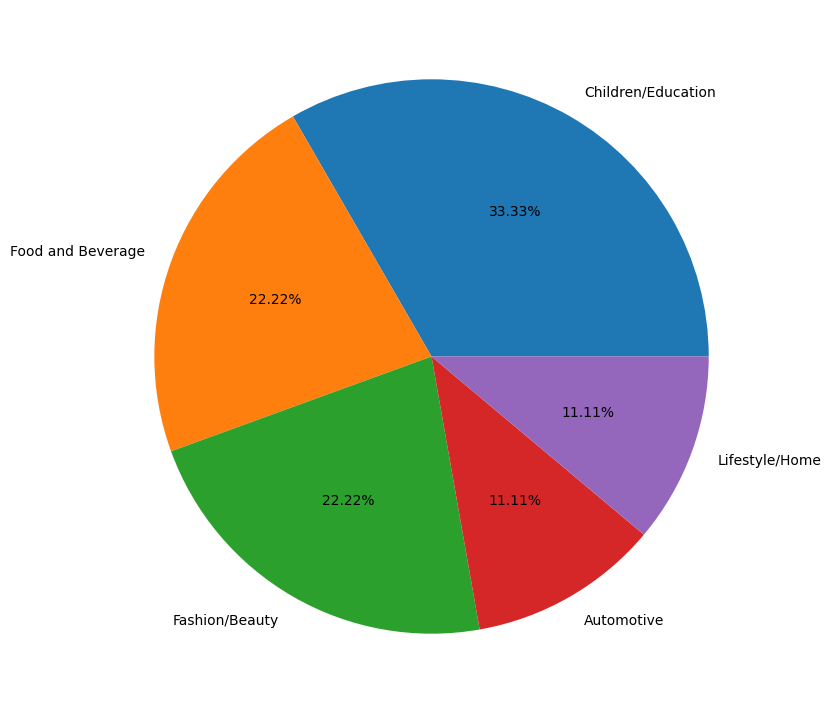

In [52]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [53]:
# Guest sharks and number of companies they invested
shark_tank.loc[shark_tank['Guest Investment Amount'] > 1]['Guest Name'].str.split(',').explode('Guest Name').value_counts().sort_values(ascending=False)

Guest Name
John              7
DavieFogarty      2
SabriSuby         1
RobertHerjavec    1
Name: count, dtype: int64

In [54]:
# Investment amount by guests, in AUD
tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount'] > 0][['Guest Name','Guest Investment Amount']]
tmpdf['Number of Guests'] = tmpdf['Guest Name'].str.count(',') + 1
tmpdf['Invetested Amount per Guest'] = tmpdf['Guest Investment Amount'] / tmpdf['Number of Guests']
tmpdf = tmpdf.set_index(tmpdf.columns.drop('Guest Name',1).tolist())['Guest Name'].str.split(',', expand=True).stack().reset_index().rename(columns={0:'Guest Name'}).loc[:, tmpdf.columns]
round(tmpdf.groupby(["Guest Name"])["Invetested Amount per Guest"].sum().sort_values(ascending=False))

Guest Name
John              595000.0
DavieFogarty       66667.0
RobertHerjavec     16667.0
SabriSuby          16667.0
Name: Invetested Amount per Guest, dtype: float64

Number of Sharks in Deal
1.0    76
2.0    32
3.0     4
5.0     1
4.0     1
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    67%
2.0    28%
3.0     4%
5.0     1%
4.0     1%
Name: proportion, dtype: object


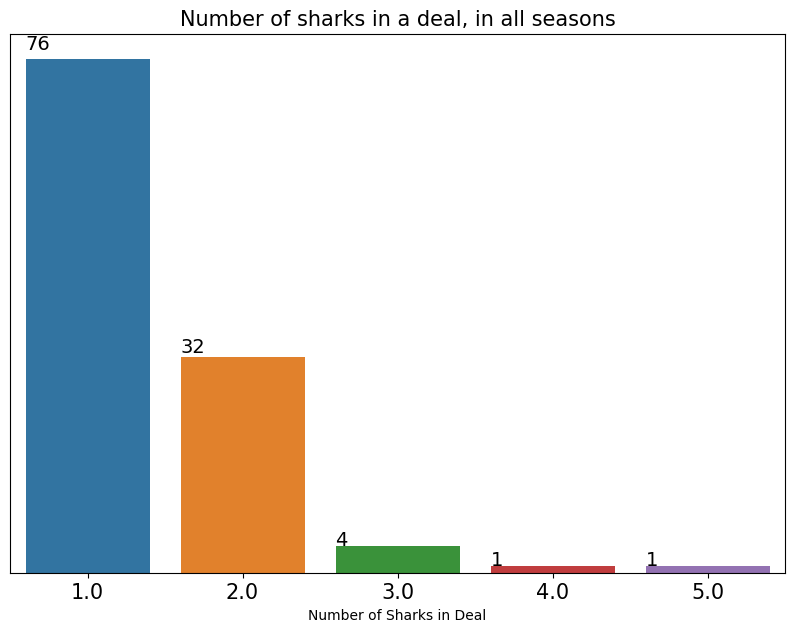

In [55]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [56]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

    Season Number    Startup Name  Total Deal Amount  Total Deal Equity
65              2  SharknadoAlive           475000.0               50.0


In [57]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Naomi did most number of solo deals, than any other Shark

Naomi Investment Amount     22
Janine Investment Amount    14
Glen Investment Amount      14
dtype: int64

In [58]:
# Sharks with most number of episode presence, in all seasons
present_cols = shark_tank.columns[shark_tank.columns.str.endswith(' Present')].tolist()
tmp = shark_tank[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(5)

# Steve,Janine,Andrew,Naomi was there in most number of episodes

Steve Present     216.0
Janine Present    216.0
Andrew Present    216.0
Naomi Present     216.0
Glen Present      161.0
dtype: float64

In [59]:
# # Top 25 Australia 🇺🇸 states of pitcher's
# tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [60]:
# # Top 20 Australia cities
# tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 USA cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [61]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (AUD) and Number times asked

Original Ask Amount
200000    28
50000     19
300000    17
100000    16
250000    15
80000      9
150000     9
500000     9
60000      5
70000      5
dtype: int64

In [62]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
20.0    61
10.0    58
25.0    20
15.0    19
5.0     13
30.0     8
40.0     5
12.0     4
50.0     3
7.5      2
dtype: int64

In [63]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Sharks mostly invested more than 100K-200K per deal

# Total Deal Amount (AUD) and Number times invested

Total Deal Amount
100000.0    15
200000.0    13
150000.0     9
50000.0      7
80000.0      7
300000.0     7
250000.0     6
25000.0      3
40000.0      3
120000.0     3
dtype: int64

In [64]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Sharks are expecting more than 25% equity, in a deal

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
25.0    17
40.0    16
30.0    15
20.0    12
50.0     9
10.0     8
33.0     5
15.0     4
45.0     3
12.0     2
dtype: int64

In [65]:
# Most frequently asked amount, deals received % and not received %?
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequently asked Deal Amount (in AUD) and % of deal received and not received

deal_percentage  no_deal_percentage
200000             68.0                32.0
100000             81.0                19.0
300000             65.0                35.0
50000              47.0                53.0
250000             60.0                40.0
150000             78.0                22.0
80000              56.0                44.0
25000             100.0                 0.0
60000              60.0                40.0
500000             33.0                67.0

In [66]:
# Most frequently asked equity, deals received % and not received %?
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequently Offered Equity (in %) and % of deal received and not received

deal_percentage  no_deal_percentage
10.0             79.0                21.0
20.0             62.0                38.0
15.0             58.0                42.0
25.0             50.0                50.0
5.0              69.0                31.0
40.0             60.0                40.0
30.0             25.0                75.0
8.0             100.0                 0.0
12.0             50.0                50.0
21.0            100.0                 0.0

In [67]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Accepted Offer'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Australian Shark Tank, ask for 250K-300K with 10% equity ✅

Original Ask Amount  Original Offered Equity
100000               10.0                       6
200000               20.0                       6
100000               20.0                       5
300000               10.0                       5
50000                20.0                       4
80000                20.0                       3
150000               10.0                       3
200000               5.0                        3
250000               10.0                       3
20000                10.0                       2
dtype: int64

In [68]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (AUD) and Number times asked (but rejected by sharks) ❌

Original Ask Amount
50000     10
200000     9
250000     6
300000     6
500000     6
80000      4
70000      3
100000     3
60000      2
90000      2
dtype: int64

In [69]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by sharks) ❌

Original Offered Equity
20.0    23
10.0    12
25.0    10
15.0     8
30.0     6
5.0      4
12.0     2
18.0     2
40.0     2
50.0     2
dtype: int64

In [70]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Shark Tank US, don't ask for 100K with 10%/20% equity or 500K with 5% equity 🔴

Original Ask Amount  Original Offered Equity
50000                20.0                       4
                     10.0                       3
80000                20.0                       3
50000                25.0                       2
70000                20.0                       2
100000               15.0                       2
200000               10.0                       2
                     20.0                       2
                     25.0                       2
250000               20.0                       2
dtype: int64

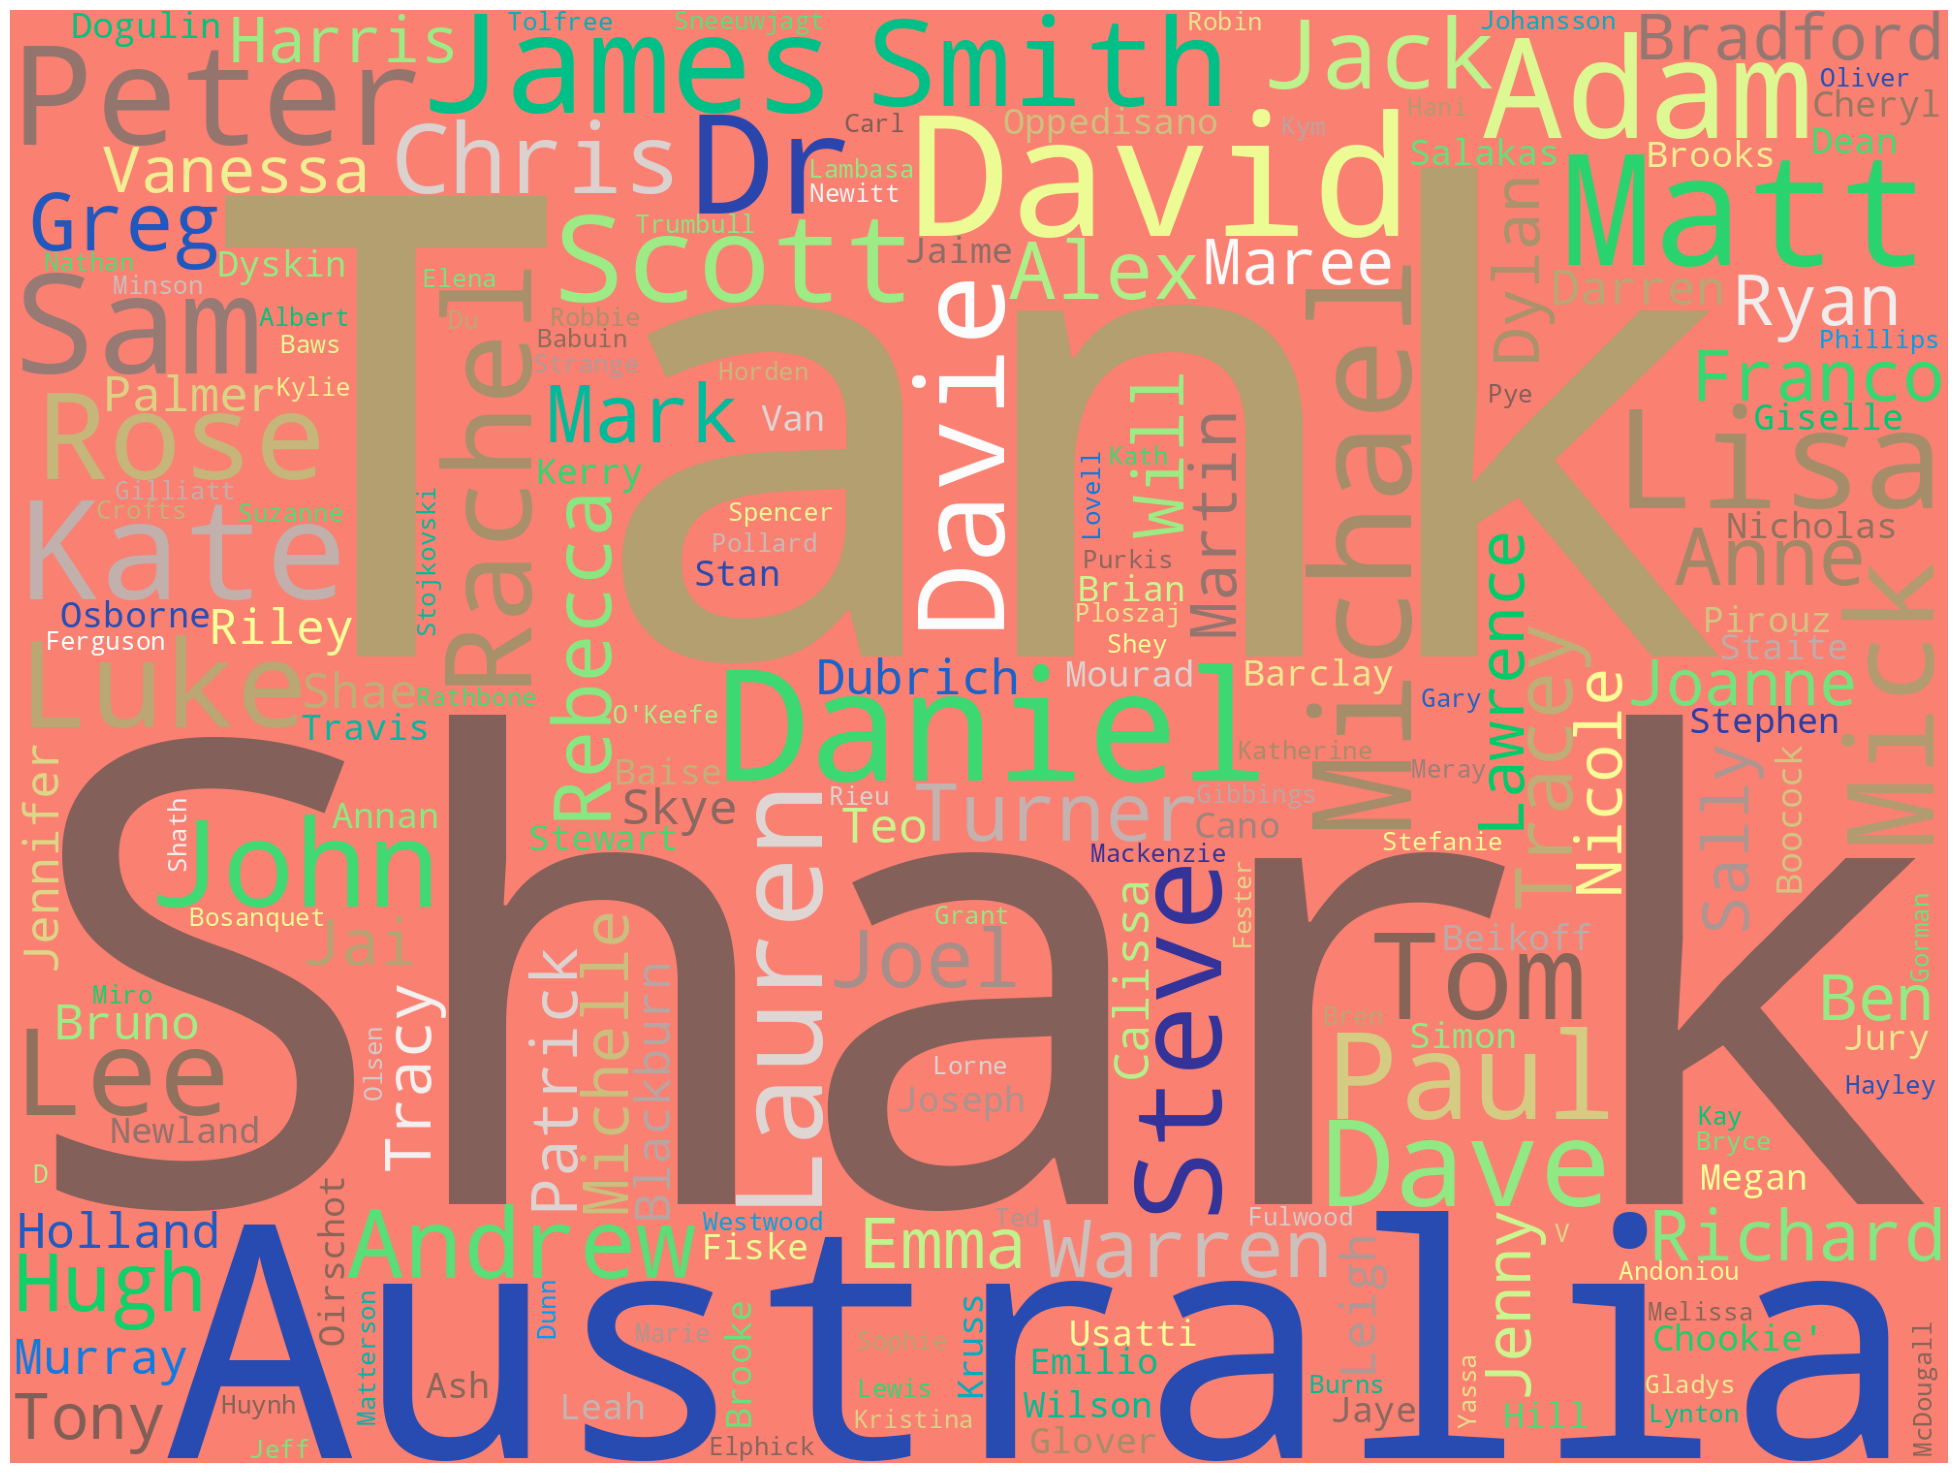

In [71]:
# Word cloud based on Pitcher name
text = " Shark Tank Australia ".join(cat for cat in shark_tank['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [72]:
# Many (20) companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    20
dtype: int64


Season Number             Startup Name  Original Ask Amount  \
2                1               CaseBoards                20000   
3                1                   Hamdog                    1   
18               1            SalsaRanchero                60000   
24               1           ScrubbaWashBag               178000   
38               1          TheDinnerLadies               140000   
46               1   FlyBabeeTravelMadeEasy                50000   
47               1         Three65Underwear                60000   
59               1              SonseeWoman                50000   
63               2            OnTheGoSports               300000   
80               2        BodyPeaceClothing                90000   
110              2            LilFairyDoors               325000   
111              2                  Vegepod                75000   
112              2               TorqueSafe               300000   
121              3         HooHaaHeadphones                   20   
127              3              MiniPallets               200000   
163              3             FreshMeals2U               150000   
168              4  TheInappropriateGiftCo.               100000   
180              4              ISRTraining               125000   
199              4            TheMasonBaker                50000   
216              5         BoringWithoutYou                36000   

     Total Deal Amount  
2              40000.0  
3                  2.0  
18             80000.0  
24            360000.0  
38            216000.0  
46             80000.0  
47            120000.0  
59            100000.0  
63            600000.0  
80            180000.0  
110           650000.0  
111           225000.0  
112           500000.0  
121               30.0  
127           400000.0  
163           200000.0  
168           250000.0  
180           187000.0  
199           100000.0  
216            50000.0

In [73]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number   Startup Name  Original Offered Equity  Total Deal Equity
2                1     CaseBoards                     10.0               35.0
3                1         Hamdog                     25.0               50.0
4                1  EdibleBugShop                     20.0               50.0
6                1    ThroatScope                     10.0               30.0
18               1  SalsaRanchero                     30.0               40.0
..             ...            ...                      ...                ...
206              4      SpacetoCo                     14.0               21.0
210              4        HexPegs                     20.0               40.0
212              4      BirthBeat                     10.0               20.0
213              4     Pod&Parcel                     15.0               30.0
218              5         Stryda                     10.0               30.0

[90 rows x 4 columns]

In [74]:
# Below (22) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    22
dtype: int64


Season Number             Startup Name  Valuation Requested  \
0                1            CricketCooler              1400000   
3                1                   Hamdog                    4   
18               1            SalsaRanchero               200000   
55               1       HaloMedicalDevices               952381   
65               2           SharknadoAlive               950000   
67               2              CarNextDoor              7500000   
74               2                Rhinohide               800000   
80               2        BodyPeaceClothing               600000   
81               2              FridayBeers               250000   
104              2               SofiSpritz              1300000   
114              3                CancerAid              5000000   
121              3         HooHaaHeadphones                  100   
127              3              MiniPallets              1000000   
160              3                  OneTalk               250000   
168              4  TheInappropriateGiftCo.              1000000   
171              4              StandInBaby              1000000   
181              4                     Subo              1000000   
185              4         GanacheChocolate              1500000   
191              4              TheBosscoop               100000   
194              4                Bare+Boho               283333   
199              4            TheMasonBaker               333333   
215              4                     QPay              4523810   

     Deal Valuation  
0         1400000.0  
3               4.0  
18         200000.0  
55         952381.0  
65         950000.0  
67        7500000.0  
74         800000.0  
80         600000.0  
81         250000.0  
104       1300000.0  
114       5000000.0  
121           100.0  
127       1000000.0  
160        250000.0  
168       1000000.0  
171       1000000.0  
181       1000000.0  
185       1500000.0  
191        100000.0  
194        283333.0  
199        333333.0  
215       4523810.0

In [75]:
# There are 7 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    7
dtype: int64


Season Number      Startup Name  Valuation Requested  Deal Valuation
38               1   TheDinnerLadies               424242        654545.0
59               1       SonseeWoman               250000        500000.0
77               2              2Shu               375000        600000.0
82               2            CapHat               480000       1200000.0
110              2     LilFairyDoors              1625000       3250000.0
111              2           Vegepod               750000       1125000.0
216              5  BoringWithoutYou               180000        250000.0

In [76]:
# Episodes which got most Viewership
print("Maximum SharkTank viewership in AU:", shark_tank['Viewers'].max(), "\n")
print(shark_tank.loc[shark_tank['Viewers']>=shark_tank['Viewers'].max()-240000][["Season Number","Episode Number","Startup Name","Viewers"]].head(12).sort_values("Viewers",ascending=False).to_string(index=False))

Maximum SharkTank viewership in AU: 973000 

 Season Number  Episode Number           Startup Name  Viewers
             1               6         ScrubbaWashBag   973000
             1               6                 K-Lite   973000
             1               6               EvilCorp   973000
             1               6             Bottlepops   973000
             3               1              CancerAid   749000
             3               1             MiniClones   749000
             3               1               iRecruit   749000
             1               3               Surfsafe   739000
             1               3          CaptainActive   739000
             1               3         MobileTyreShop   739000
             1               3 SimplyMoreishMarinades   739000
             1               3                TouchCo   739000


In [77]:
# Episodes which got least Viewership
print("Minimum SharkTank viewership in AU:", shark_tank['Viewers'].min(), "\n")
print(shark_tank.loc[shark_tank['Viewers']<=shark_tank['Viewers'].min()+150000][["Season Number","Episode Number","Startup Name","Viewers"]].head(12).sort_values("Viewers").to_string(index=False))

Minimum SharkTank viewership in AU: 237000 

 Season Number  Episode Number     Startup Name  Viewers
             5               1 BoringWithoutYou   237000
             5               1           Pixxie   237000
             5               1           Stryda   237000
             4              13        BirthBeat   371000
             4              13       Pod&Parcel   371000
             4              13   TheSeekSociety   371000
             4              13             QPay   371000


Multiple Entrepreneurs
0    133
1     86
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    61%
1    39%
Name: proportion, dtype: object


<Axes: ylabel='count'>

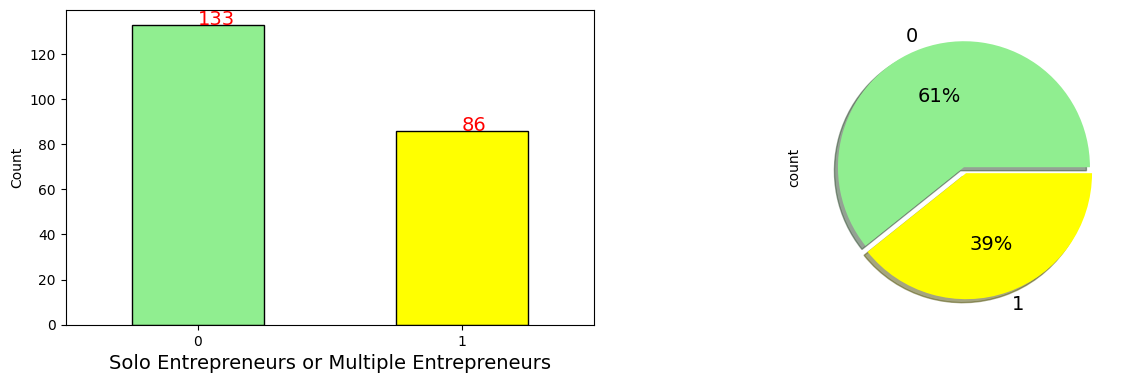

In [78]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

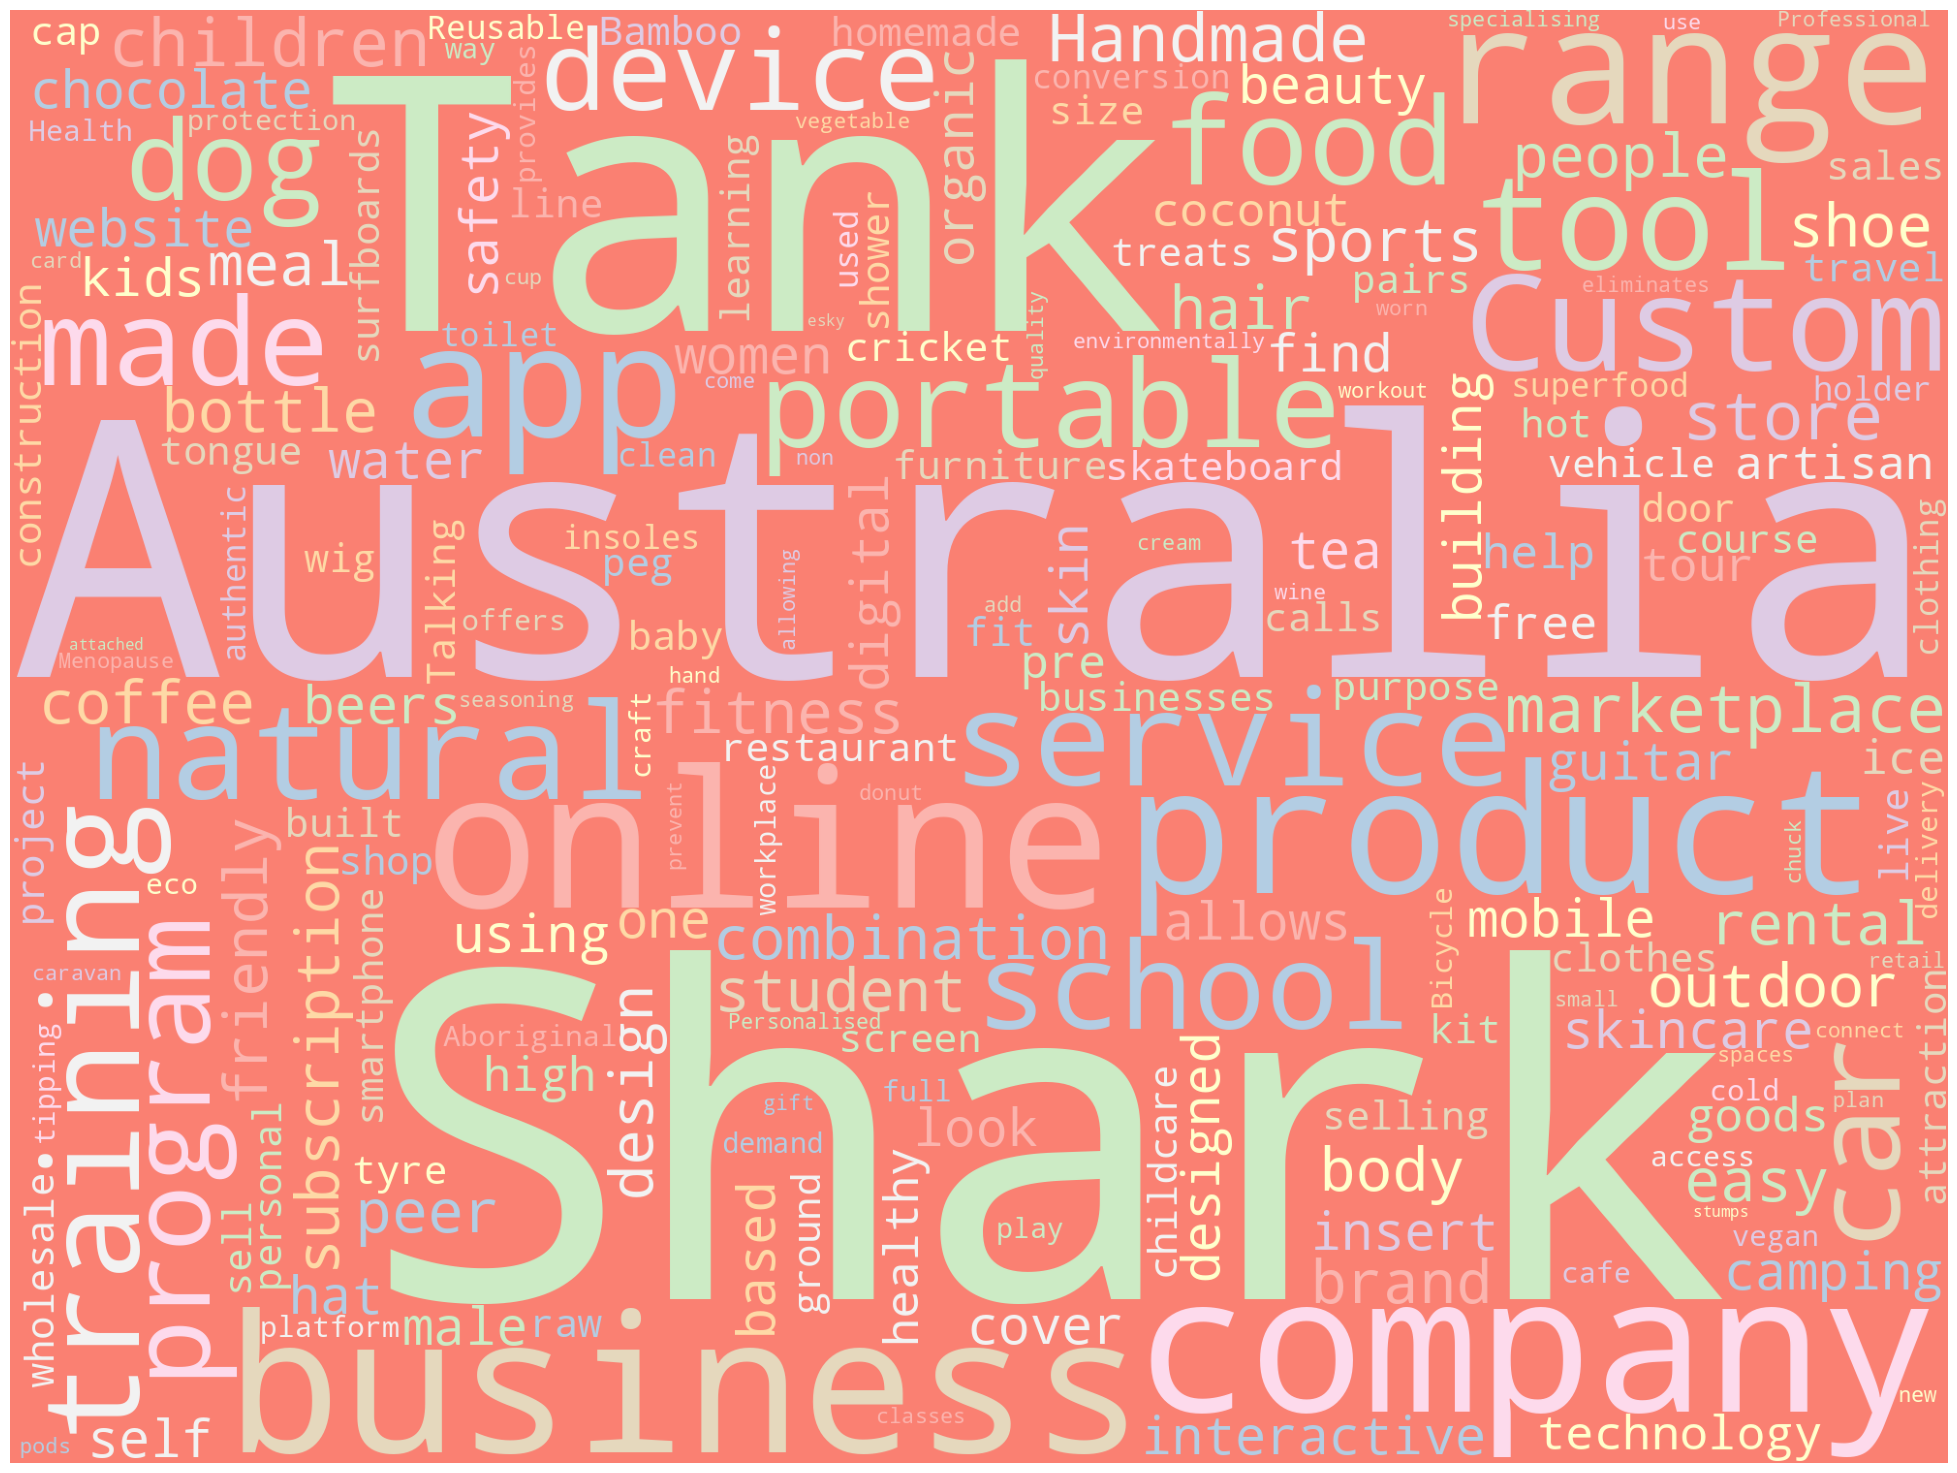

In [79]:
# Word cloud based on Business Description of startups came in all seasons
text = " Shark Tank Australia ".join(cat for cat in shark_tank.loc[shark_tank['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [80]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [81]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.1
# matplotlib version: 3.7.5
# seaborn version: 0.12.2
# plotly version: 5.18.0

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.7.5
seaborn version: 0.12.2
plotly version: 5.18.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [82]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [83]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [84]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [85]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [86]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [87]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [88]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Steve Investment Amount'].fillna(0) + shark_tank['Janine Investment Amount'].fillna(0) + shark_tank['Andrew Investment Amount'].fillna(0) + shark_tank['Naomi Investment Amount'].fillna(0) + shark_tank['Glen Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [89]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Steve Investment Equity'].fillna(0) + shark_tank['Janine Investment Equity'].fillna(0) + shark_tank['Andrew Investment Equity'].fillna(0) + shark_tank['Naomi Investment Equity'].fillna(0) + shark_tank['Glen Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [90]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [91]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].isnull()) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [92]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [93]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [94]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' & ')==False)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [95]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [96]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [97]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [98]:
shark_tank.loc[shark_tank['Total Deal Amount'] < shark_tank["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]